# Assignment: Lab 02 - Web Scraping
## Krishu Wadhwa - euj7fh
## October 02, 2024

In [48]:
# imports 

import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Pick something else on Craigslist: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of EDA you'd do with it.**

In [49]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://richmond.craigslist.org/search/mca?purveyor=owner#search=1~gallery~0~0' # motorcycles instead of cars+trucks (used richmond for more results)
raw = requests.get(url,headers=header) # Get page

**2. Get your search results of interest and extract data from them, using code similar to what's below.**

In [50]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [51]:
import re
brands = ['honda', 'yamaha', 'kawasaki', 'suzuki', 'harley', 'bmw', 'ducati', 'ktm', 'indian']
data = []
for k in range(len(listings)):
    title = listings[k].find('div', class_='title').get_text().lower()
    price = listings[k].find('div', class_='price').get_text() if listings[k].find('div', class_='price') else 'N/A'
    link = listings[k].find(href=True)['href']

    words = title.split() # find motorcycle brand
    hits = [word for word in words if word in brands]
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title)
    if regex_search is None:
        year = None
    else:
        year = regex_search.group(0)

    data.append({'title': title, 'price': price, 'year': year, 'link': link, 'brand': brand})

data


[{'title': '2006 suzuki hayabusa',
  'price': '$5,000',
  'year': '2006',
  'link': 'https://richmond.craigslist.org/mcy/d/richmond-2006-suzuki-hayabusa/7789921793.html',
  'brand': 'suzuki'},
 {'title': '1974 suzuki gt 380 time capsule beauty 3,800 miles $7500',
  'price': '$7,500',
  'year': '1974',
  'link': 'https://richmond.craigslist.org/mcy/d/richmond-1974-suzuki-gt-380-time/7789837612.html',
  'brand': 'suzuki'},
 {'title': '2023 honda xr150l',
  'price': '$3,250',
  'year': '2023',
  'link': 'https://richmond.craigslist.org/mcy/d/glen-allen-2023-honda-xr150l/7789766135.html',
  'brand': 'honda'},
 {'title': '2023 klr 650 adventure',
  'price': '$6,500',
  'year': '2023',
  'link': 'https://richmond.craigslist.org/mcy/d/amelia-court-house-2023-klr-650/7789651828.html',
  'brand': 'missing'},
 {'title': '2004 kawasaki zx10r',
  'price': '$2,000',
  'year': '2004',
  'link': 'https://richmond.craigslist.org/mcy/d/midlothian-2004-kawasaki-zx10r/7789460940.html',
  'brand': 'kawasa

**3. Wrangle your data, do some EDA, and make some plots. Try to find some interesting relationships or stories to tell about your data.**

In [52]:
df = pd.DataFrame.from_dict(data)

df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')

df['year'] = pd.to_numeric(df['year'],errors='coerce')

df['age'] = 2025-df['year']

print(df.shape)
df.head()

(63, 6)


,title,price,year,link,brand,age
0,2006 suzuki hayabusa,5000,2006.0,https://richmond.craigslist.org/mcy/d/richmond...,suzuki,19.0
1,"1974 suzuki gt 380 time capsule beauty 3,800 m...",7500,1974.0,https://richmond.craigslist.org/mcy/d/richmond...,suzuki,51.0
2,2023 honda xr150l,3250,2023.0,https://richmond.craigslist.org/mcy/d/glen-all...,honda,2.0
3,2023 klr 650 adventure,6500,2023.0,https://richmond.craigslist.org/mcy/d/amelia-c...,missing,2.0
4,2004 kawasaki zx10r,2000,2004.0,https://richmond.craigslist.org/mcy/d/midlothi...,kawasaki,21.0


In [53]:
print(df['price'].describe()) # price data
print(df['age'].describe()) # age data

count       63.000000
mean      7081.730159
std       4165.049805
min        800.000000
25%       3500.000000
50%       6400.000000
75%       8750.000000
max      20000.000000
Name: price, dtype: float64
count    52.000000
mean     16.326923
std      12.157014
min       1.000000
25%       7.500000
50%      16.500000
75%      21.000000
max      52.000000
Name: age, dtype: float64


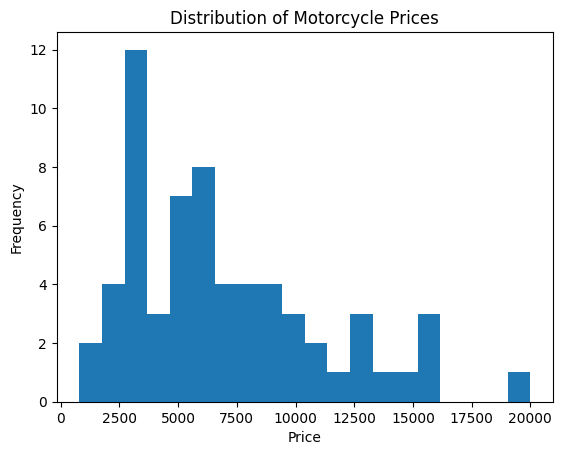

In [54]:
# histogram of prices

df['price'].hist(grid=False, bins=20)
plt.title('Distribution of Motorcycle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

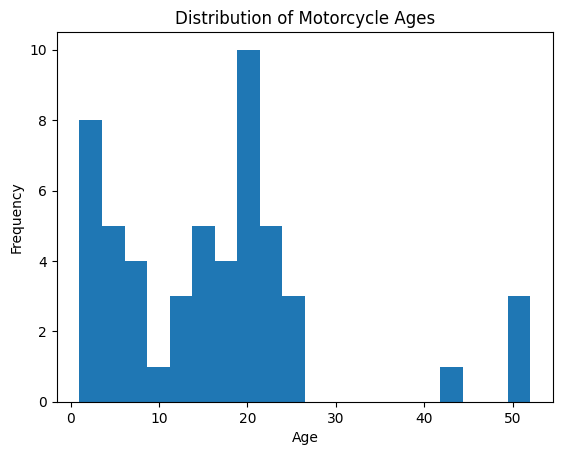

In [55]:
# histogram of agesm

df['age'].hist(grid=False, bins=20)
plt.title('Distribution of Motorcycle Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [58]:
# analyze price by brand
print(df.groupby('brand')['price'].describe())


          count          mean          std      min      25%      50%  \
brand                                                                   
bmw         1.0   7500.000000          NaN   7500.0   7500.0   7500.0   
ducati      1.0   4500.000000          NaN   4500.0   4500.0   4500.0   
harley     14.0   8892.785714  3605.071986   2700.0   6750.0   8500.0   
honda      13.0   4226.923077  1840.359497    800.0   3250.0   3500.0   
kawasaki    3.0   3166.666667  1607.275127   2000.0   2250.0   2500.0   
ktm         1.0  12500.000000          NaN  12500.0  12500.0  12500.0   
missing    23.0   8826.086957  4676.072302   1500.0   6000.0   7900.0   
suzuki      4.0   4550.000000  2215.851981   2700.0   2925.0   4000.0   
yamaha      3.0   3833.333333  1357.694124   3000.0   3050.0   3100.0   

              75%      max  
brand                       
bmw        7500.0   7500.0  
ducati     4500.0   4500.0  
harley    10500.0  15999.0  
honda      5100.0   8300.0  
kawasaki   3750.0   50

In [59]:
# analyze age by brand
print(df.groupby('brand')['age'].describe())

          count       mean        std   min    25%   50%    75%   max
brand                                                                
bmw         1.0   8.000000        NaN   8.0   8.00   8.0   8.00   8.0
ducati      1.0  24.000000        NaN  24.0  24.00  24.0  24.00  24.0
harley     12.0  16.000000   6.941312   3.0  11.00  17.0  21.25  26.0
honda      11.0  14.363636  12.706477   2.0   3.50  17.0  21.00  43.0
kawasaki    3.0  18.333333   3.785939  14.0  17.00  20.0  20.50  21.0
ktm         1.0   5.000000        NaN   5.0   5.00   5.0   5.00   5.0
missing    17.0  13.470588  12.405229   1.0   5.00  12.0  20.00  52.0
suzuki      4.0  27.000000  16.186414  16.0  18.25  20.5  29.25  51.0
yamaha      2.0  35.000000  22.627417  19.0  27.00  35.0  43.00  51.0


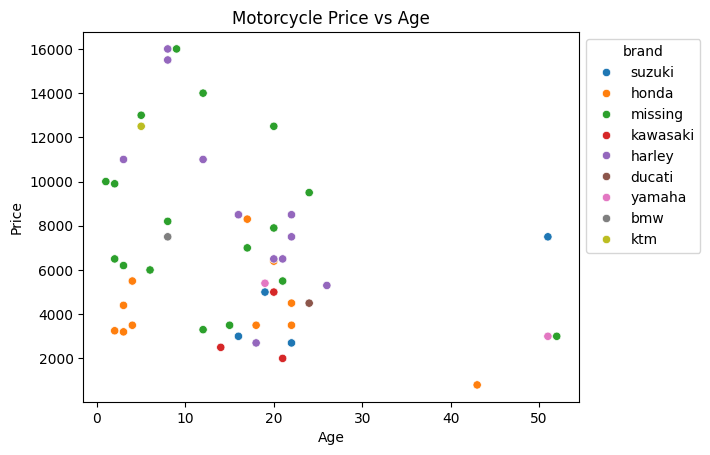

In [64]:
ax = sns.scatterplot(data = df, x = 'age', y = 'price', hue = 'brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Motorcycle Price vs Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

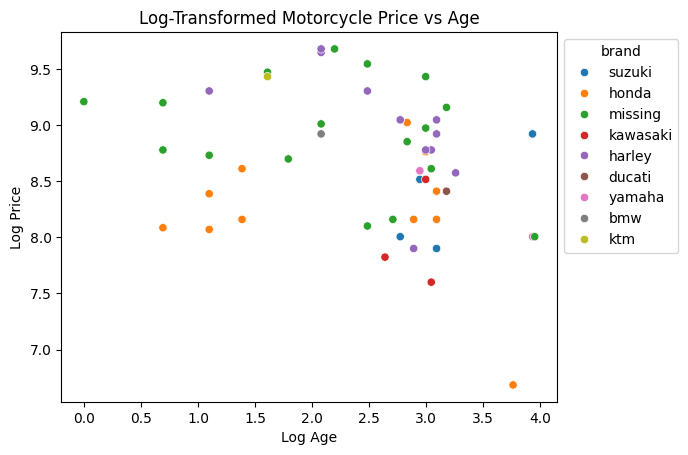

In [65]:
# Log-transformed scatter plot

df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data = df, x = 'log_age', y = 'log_price', hue = 'brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Log-Transformed Motorcycle Price vs Age')
plt.xlabel('Log Age')
plt.ylabel('Log Price')
plt.show()

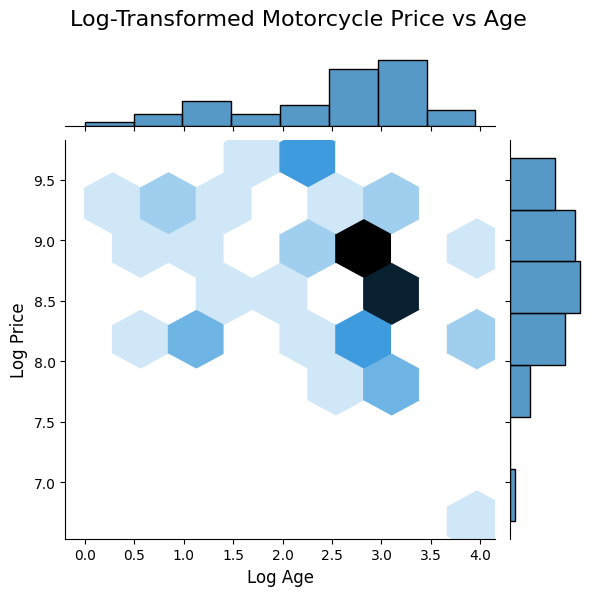

In [72]:
graph = sns.jointplot(data = df, x = 'log_age', y = 'log_price', kind = 'hex')
graph.fig.suptitle('Log-Transformed Motorcycle Price vs Age', fontsize=16) # title
graph.fig.subplots_adjust(top=0.9) # title adjust
graph.set_axis_labels('Log Age', 'Log Price', fontsize=12) # axis labels
plt.show()